<a href="https://colab.research.google.com/github/jdberkson/OPTI-556-Computational-Imaging/blob/main/Homework5_JoelB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5 OPTI 556

## Joel Berkson 11/14/2021

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from skimage import io

In [3]:
def g(rho,z, wo):
  # all spatial terms are in units of wavelengths
  g=(1/(wo**2+1j*z))*np.exp(2*np.pi*1j*z)*np.exp(-np.pi*rho**2/(wo**2+1j*z))
  return g

9.983546797248063e-05


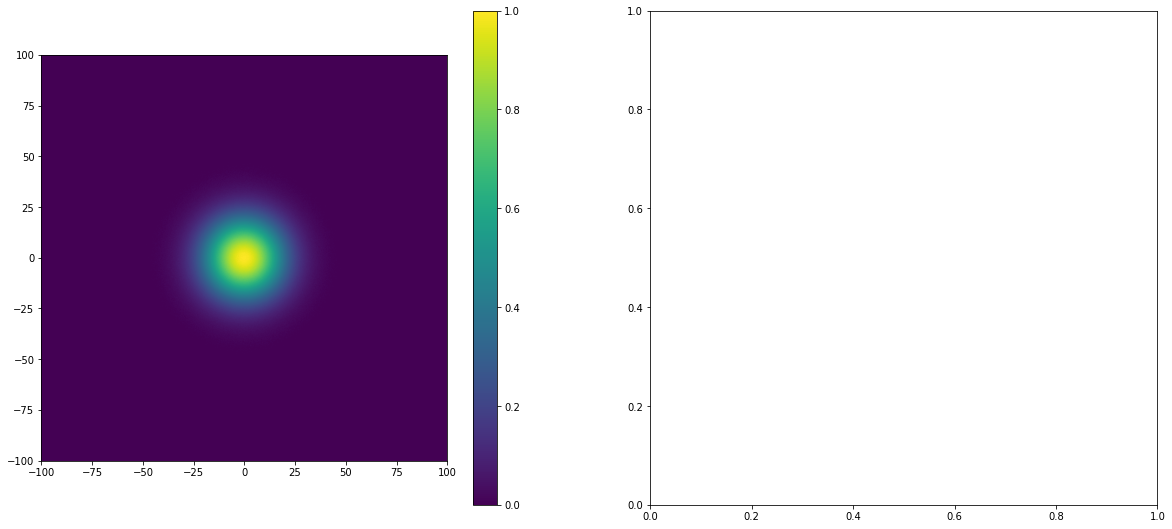

In [252]:
photons = 10000
x=np.linspace(-100,100,1024)
xx,yy= np.meshgrid(x,x)
X = np.abs(g(np.sqrt(xx**2+yy**2), 100, 2))**2
Xnorm = X/np.max(X)
print(np.max(X))
Xphotnoise = np.sqrt(np.random.poisson(np.power(Xnorm*np.sqrt(photons),2)))/np.sqrt(photons)
Xphotnoise[Xphotnoise>1] = 1
Xphotnoise[Xphotnoise<0] *= 0
plt.figure(figsize=[20,20])
plt.subplot(2,2,1)
plt.imshow(Xphotnoise,extent=[-100,100,-100,100])
plt.colorbar()
plt.subplot(2,2,2)
